![Header Image]( ../assets/header_image.png "Header Image")

# Assignment: Localization

Welcome to the assignment **Localization**.

In this assignment, we will use the bag-file that has been recorded in the end of the C++ task to evaluate the implemented solution.
There to we will walk through the following steps:

- Importing and parsing of the information from the bag-file using [rosbags](https://pypi.org/project/rosbags/)
- Converting the imported data into a [pandas](https://pandas.pydata.org/) dataframe.
- Assignment of ground-truth poses to the corresponding estimated vehicle poses
- Implementation and visualization of various metrics for the evaluation of the pose estimation.

### Import 
Let's start by importing all the necessary packages for this assignment:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable

from rosbags.rosbag2 import Reader
from rosbags.serde import deserialize_cdr

## Introduction to `TrajectoryPoint2D`-Class
In this assignment we will evaluate the estimated pose of the vehicle. In the first step we will load the data from the bag file and store the information in a list of `TrajectoryPoint2D`.

An object of class `TrajectoryPoint2D` holds the following members:
 - `x` x-Position of the vehicle in map-frame [m]
 - `y` y-Position of the vehicle in map-frame [m]
 - `psi` yaw-Angle of the vehicle in map-frame [deg]
 - `t` timestamp of pose [s]

Next to the member objects the class offers two relevant functions:
 - `def from_odometry(self, odometry)`
 - `def from_pose(self, pose)`
 
Both functions are called on an `TrajectoryPoint2D`-object and set all member variables of this object based on a `nav_msgs::msg::Odometry` respectively a `geometry_msgs::msg::PoseStamped` message.

To make use of this class we import `TrajectoryPoint2D` in the following:

In [2]:
from localization.trajectory import TrajectoryPoint2D

## Task: Importing data from a ROS2 Bag-File using [rosbags](https://pypi.org/project/rosbags/)

First of all we need to import the data that we've captured within a ROS2 bag-file.
We will use the [rosbags](https://pypi.org/project/rosbags/)-package for this purpose. For further information please refere to the [rosbags documentation](https://ternaris.gitlab.io/rosbags/).

To load the bag-file, copy it into the `${REPOSITORY}/bag` directory of this repository.
Afterwards specify the name of the folder that contains the `*.db3`-file.

In [12]:
bag_path = '../bag'
### START CODE HERE ###
bag_folder_name = None
### Solution:
bag_folder_name = 'localization_evaluation'
### END CODE HERE ###
bag_path += '/'+bag_folder_name

Now we need to finish the implementation of the `read_trajectory` function. This function reads a given bag-file and returns a list of `TrajectoryPoint2D` based on a `nav_msgs::msg::Odometry` or a `geometry_msgs::msg::PoseStamped` message. Try to understand how this function works and fill in the gaps.


Your task is to call the functions `from_odometry` respectively `from_point` on a `TrajectoryPoint2D`-object and append the resulting point to the trajectory.

In [13]:
def read_trajectory(bag_path, topic_name):
    """
    Reads a given bag-file and returns a list of TrajectoryPoint2D based on a nav_msgs::msg::Odometry or a geometry_msgs::msg::PoseStamped message
    
    Arguments:
    bag_path -- String indicating the location of the bag-file
    topic_name -- String indicating the topic name to derive the trajectory from
    
    Returns:
    trj -- List of TrajectoryPoint2D
    """
    # create and open a rosbag-reader
    with Reader(bag_path) as reader:
        # create an empty list that represents the trajectory
        trj = []
        # get connection that represents the specific topic
        connection = [x for x in reader.connections if x.topic == topic_name]
        # iterate over messages of specific topic
        for connection, timestamp, rawdata in reader.messages(connections=connection):
            # initialize a TrajectoryPoint2D-object
            point = TrajectoryPoint2D()
            # deserialize the rawdata based on the specific msgtype
            msg = deserialize_cdr(rawdata, connection.msgtype)
            if connection.msgtype == 'nav_msgs/msg/Odometry':               
                ### START CODE HERE ###
                # set all members of the TrajectoryPoint2D-object based on a nav_msgs::msg::Odometry
                
                # append the TrajectoryPoint2D-object to trajectory
                
                ### Solution:
                # set all members of the TrajectoryPoint2D-object based on a nav_msgs::msg::Odometry
                point.from_odometry(msg)
                # append the TrajectoryPoint2D-object to trajectory
                trj.append(point)
                ### END CODE HERE ###
            elif connection.msgtype=='geometry_msgs/msg/PoseStamped':
                ### START CODE HERE ###
                # set all members of the TrajectoryPoint2D-object based on a geometry_msgs::msg::PoseStamped
                
                # append the TrajectoryPoint2D-object to trajectory
                
                ### Solution:
                # set all members of the TrajectoryPoint2D-object based on a geometry_msgs::msg::PoseStamped
                point.from_pose(msg)
                # append the TrajectoryPoint2D-object to trajectory
                trj.append(point)
                ### END CODE HERE ###
            else:
                # print message if topic contains a message of unsupported type
                print("Message format {} is currently not supported!".format(connection.msgtype))
        # return the trajectory
        return trj

Now that you've implemented `read_trajectory` call this function once for the ground-truth pose on topic `/ground_truth/pose` and for the estimated vehicle pose on topic `/localization/predicted_pose`. Store the resulting trajectory into two specific variables.
##### __Hints__:
- The path to the bag file is stored in the variable `bag_path`.

In [43]:
### START CODE HERE ###


### Solution:
gt_trj=read_trajectory(bag_path, '/ground_truth/pose')
est_trj=read_trajectory(bag_path, '/localization/predicted_pose')
### END CODE HERE ###

## Task: Creating a pandas data frame from both trajectories

Now that we've succesfully imported the trajectory-data, we will convert these into a [pandas data frame](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html).

At first we will create two data frames: one for the ground-truth trajectory and one for the estimated trajectory. Each data frame contains four colums `t`, `x`, `y` and `psi`. In this case we use list comprehension to store all these trajectory-variables into the data frame.

Your task is to replace all `None` placeholders within the code-cell below.
##### __Hints__:
- The `None` placeholders refer to the specific trajectory we would like to derive the information from.

In [42]:
### START CODE HERE ###
# Ground-Truth-Trajectory-Data-Frame
#df_gt = pd.DataFrame({'t': [point.t for point in None], 'x': [point.x for point in None], 'y': [point.y for point in None], 'psi': [point.psi for point in None]})
# Estimated-Trajectory-Data-Frame
#df_est = pd.DataFrame({'t': [point.t for point in None], 'x': [point.x for point in None], 'y': [point.y for point in None], 'psi': [point.psi for point in None]})
### Solution:
# Ground-Truth-Trajectory-Data-Frame
df_gt = pd.DataFrame({'t': [point.t for point in gt_trj], 'x': [point.x for point in gt_trj], 'y': [point.y for point in gt_trj], 'psi': [point.psi for point in gt_trj]})
# Estimated-Trajectory-Data-Frame
df_est = pd.DataFrame({'t': [point.t for point in est_trj], 'x': [point.x for point in est_trj], 'y': [point.y for point in est_trj], 'psi': [point.psi for point in est_trj]})
### END CODE HERE ###

Now we have two data-frames, but to compare the trajectories we need an order of individual ground-truth and estimated poses from both data-frames. Therefore we want to combine the two data-frames into one. The goal is to assign a corresponding ground-truth pose to each estimated pose. Since the ground truth trajectory was published with a higher frequency (20Hz) compared to the estimated trajectory (10Hz), the temporal error should be maximal half the period of the publication frequency of the ground truth pose.

To merge both data-frames we will use the function `mege_asof` from pandas. This function allows to merge two data frames based on a distance metric of a defined field. In this case we use the time difference between the poses as metric. Your task is to choose the `tolerance` for matching two poses. Replace the `None` placeholder in the code cell below.
##### __Hints__:
- The ground truth pose is published with a frequency of 20 Hz. The period between two messages is therefore 0.05 seconds.

In [41]:
### START CODE HERE ###
df = pd.merge_asof(df_est, df_gt, on='t', tolerance=None, direction='nearest', suffixes=['_estimate', '_ground_truth'])
### Solution:
df = pd.merge_asof(df_est, df_gt, on='t', tolerance=0.025, direction='nearest', suffixes=['_estimate', '_ground_truth'])
### END CODE HERE ###

## Subjective evaluation of trajectories

A naive way to evaluate two trajectories is to visualize them in a 2D plot and compare them subjectively. Execute the code cell below to generate a plot.

In [96]:
# Create an overview plot that visualizes both trajectories
fig, ax = plt.subplots(1,1,figsize=(20, 8))
# Plot ground-truth trajectory
df.plot(x='x_ground_truth', y='y_ground_truth', ax=ax)
# Plot estimated trajectory
df.plot(x='x_estimate', y='y_estimate', ax=ax)
# Set equal axes
ax.axis('equal')
# Hide axis labels
ax.set_xlabel('')
ax.set_ylabel('')
# Set legend labels
ax.legend(['Ground Truth Trajectory', 'Estimated Trajectory'])
# Create a second plot with detailed views
fig, ax = plt.subplots(1,3,figsize=(20, 8))
# Plot trajectories on specific subplots
df.plot(x='x_ground_truth', y='y_ground_truth', ax=ax[0], marker='.', linestyle='none', legend=None)
df.plot(x='x_estimate', y='y_estimate', ax=ax[0], marker='.', linestyle='none', legend=None)
df.plot(x='x_ground_truth', y='y_ground_truth', ax=ax[1], marker='.', linestyle='none', legend=None)
df.plot(x='x_estimate', y='y_estimate', ax=ax[1], marker='.', linestyle='none', legend=None)
df.plot(x='x_ground_truth', y='y_ground_truth', ax=ax[2], marker='.', linestyle='none', legend=None)
df.plot(x='x_estimate', y='y_estimate', ax=ax[2], marker='.', linestyle='none', legend=None)
# Set axes limits for detail views
ax[0].set_xlim(2370, 2410)
ax[0].set_ylim(470, 510)
ax[1].set_xlim(2370, 2410)
ax[1].set_ylim(620, 660)
ax[2].set_xlim(2500, 2520)
ax[2].set_ylim(640, 660)
# Hide axis labels
for axis in ax:
    axis.set_xlabel('')
    axis.set_ylabel('') 
plt.show()

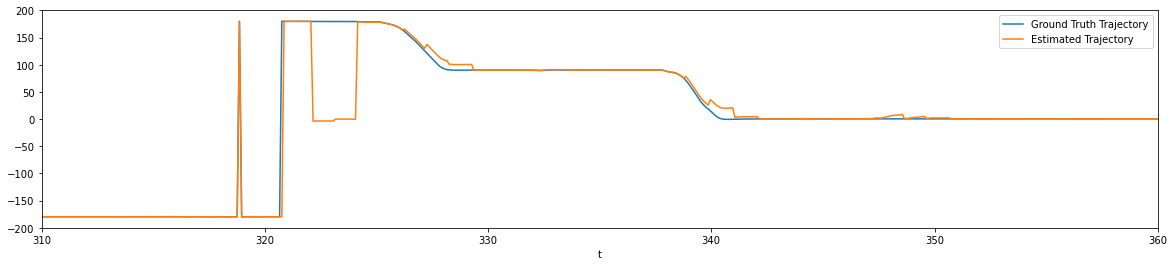

In [105]:
fig, ax = plt.subplots(1,1,figsize=(20, 4))
ax.set_xlim(310, 360)
ax.set_ylim(-200, 200)
df.plot(x='t', y='psi_ground_truth', ax=ax)
df.plot(x='t', y='psi_estimate', ax=ax)
ax.legend(['Ground Truth Trajectory', 'Estimated Trajectory'])
plt.show()

In [108]:
df['dx'] = df['x_ground_truth'] - df['x_estimate']
df['dy'] = df['y_ground_truth'] - df['y_estimate']
df['dpsi'] = df['psi_ground_truth'] - df['psi_estimate']

In [ ]:
fig, ax = plt.subplots(1,2,figsize=(20, 4))
ax[0].set_ylim(-1, 1)
ax[1].set_ylim(-1, 1)
df.plot(x='t', y='dx', ax=ax[0])
df.plot(x='t', y='dy', ax=ax[1])
plt.show()

In [ ]:
fig, ax = plt.subplots(1,1,figsize=(20, 4))
ax.set_ylim(-15, 15)
df.plot(x='t', y='dpsi', ax=ax)
plt.show()

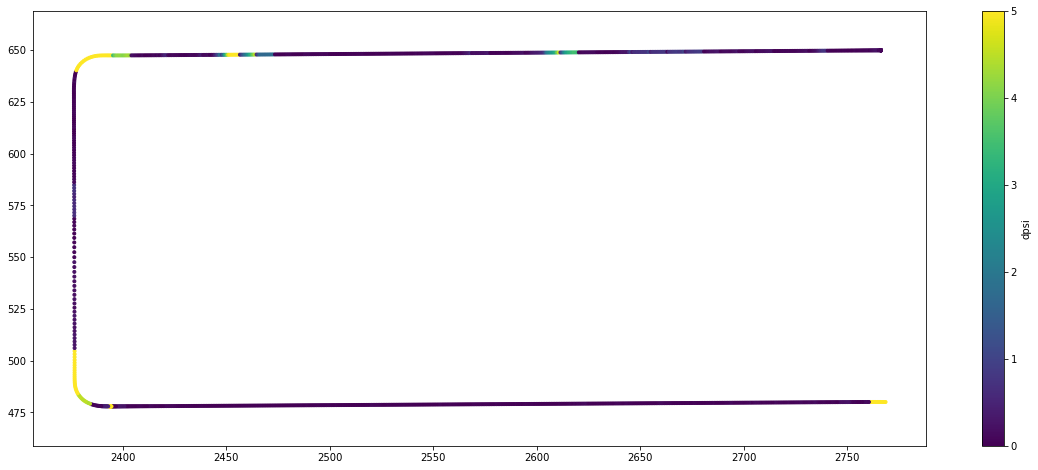

In [111]:
colormap = plt.get_cmap('viridis')
normalize = Normalize(vmin=0.0, vmax=5.0)
scalar_mappable = ScalarMappable(cmap=colormap, norm=normalize)
colors = scalar_mappable.to_rgba(np.abs(df['dpsi']))
fig, ax = plt.subplots(1,1,figsize=(20, 8))
ax.axis('equal')
plt.scatter(df['x_ground_truth'], df['y_ground_truth'], c=colors, marker='.')
colorbar = plt.colorbar(scalar_mappable)
colorbar.set_label('dpsi')
plt.show()

In [ ]:
fig, ax = plt.subplots(1,2,figsize=(20, 4))
ax[0].set_ylim(-1, 1)
ax[1].set_ylim(-1, 1)
combined_df.plot(x='t', y='dlon', ax=ax[0])
combined_df.plot(x='t', y='dlat', ax=ax[1])
plt.show()

In [ ]:
fig, ax = plt.subplots(1,2,figsize=(20, 4))
combined_df.boxplot(column='dlon', ax=ax[0])
combined_df.boxplot(column='dlat', ax=ax[1])
plt.show()

In [ ]:

colormap = plt.get_cmap('viridis')
normalize = Normalize(vmin=0.0, vmax=5.0)
scalar_mappable = ScalarMappable(cmap=colormap, norm=normalize)
colors = scalar_mappable.to_rgba(np.abs(combined_df['dpsi']))
fig, ax = plt.subplots(1,1,figsize=(20, 8))
ax.axis('equal')
plt.scatter(combined_df['x_ground_truth'], combined_df['y_ground_truth'], c=colors)
colorbar = plt.colorbar(scalar_mappable)
colorbar.set_label('dpsi')
plt.show()

## Wrap Up

- You learned how to apply...
- You learned how to apply...
- You learned how to...
- You learned how to...

## License


MIT License

Copyright 2023 Institute for Automotive Engineering of RWTH Aachen University.